# <ins>**Perth Housing Market VS Iron Ore Price**</ins>

## **Link for Datasets**

https://explore.data.abs.gov.au/vis?tm=perth%20house%20prices&pg=0&df[ds]=ECONOMY_TOPICS&df[id]=RPPI&df[ag]=ABS&df[vs]=1.0.0&pd=2008-Q1%2C2021-Q1&dq=2%2B1%2B3.1%2B2%2B3..Q&ly[cl]=REGION&ly[rw]=TIME_PERIOD&ly[rs]=MEASURE&fc=Measure&vw=tb

https://www.kaggle.com/datasets/syuzai/perth-house-prices

https://files.marketindex.com.au/files/workbooks/commodities-workbook.xlsx

https://www.rba.gov.au/statistics/tables/xls/g01hist.xls

## Written Report

## Summarises the analysis:-

#  Conclusions:-

## Data Preparation and cleaning

## First file cleanup process

In [2]:
!pip install gmaps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.0 MB/s 
     |████████████████████████████████| 1.6 MB 41.1 MB/s 
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076111 sha256=c333bfb936ed9447cee540e8c4ae66e47c6d26612e92f25276572568824a3f81
  Stored in directory: /root/.cache/pip/wheels/3d/1c/cb/c46f4199210e632b28d78d05a00bfdccbf6dfcd3f5b051d6bf
Successfully built gmaps


In [3]:
# Import Dependencies

import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
import requests
import time
from scipy.stats import linregress
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pprint import pprint

In [5]:
# Load and Read house Data File, store into Pandas DataFrames
house_data_to_load = "All residential property data.csv"
house_data = pd.read_csv(house_data_to_load)
house_data.head()

,DATAFLOW,MEASURE: Measure,PROPERTY_TYPE: Property type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment
0,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q1,97.5,IN: Index Numbers,NaN,NaN
1,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q2,98.9,IN: Index Numbers,NaN,NaN
2,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q3,95.5,IN: Index Numbers,NaN,NaN
3,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q4,94.3,IN: Index Numbers,NaN,NaN
4,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2009-Q1,94.2,IN: Index Numbers,NaN,NaN


In [6]:
# Reduce to Required columns 

reduced_columns = house_data[["DATAFLOW","MEASURE: Measure","PROPERTY_TYPE: Property type","REGION: Region","FREQ: Frequency", "TIME_PERIOD: Time Period", "OBS_VALUE" 
                              ]]
reduced_columns.head()


,DATAFLOW,MEASURE: Measure,PROPERTY_TYPE: Property type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE
0,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q1,97.5
1,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q2,98.9
2,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q3,95.5
3,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q4,94.3
4,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2009-Q1,94.2


In [7]:
# Rename the columns
house_data_df = reduced_columns.rename(columns={"MEASURE: Measure": "Unit of Measurement", "PROPERTY_TYPE: Property type": "Property Type",
                                              "REGION: Region": "Region", "FREQ: Frequency": "Frequency",
                                           "TIME_PERIOD: Time Period":"Time Period","OBS_VALUE": "Observation Value"})
house_data_df.head() 

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
0,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q1,97.5
1,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q2,98.9
2,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q3,95.5
3,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q4,94.3
4,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2009-Q1,94.2


In [8]:
# verify counts with no missing values
house_data_df.count()

DATAFLOW               4293
Unit of Measurement    4293
Property Type          4293
Region                 4293
Frequency              4293
Time Period            4293
Observation Value      4293
dtype: int64

In [9]:
# looking for unique values in region coloumns
house_data_df["Region"].unique()

array(['3GBRI: Greater Brisbane', '2GMEL: Greater Melbourne',
       '6GHOB: Greater Hobart', '5GPER: Greater Perth',
       '4GADE: Greater Adelaide', '7GDAR: Greater Darwin',
       '1GSYD: Greater Sydney', '8ACTE: Australian Capital Territory',
       '100: Weighted average of eight capital cities'], dtype=object)

In [10]:
#Create a new DataFrame that looks into a specifically Perth housedata
Perth_housedata_df = house_data_df.loc[house_data_df["Region"] == "5GPER: Greater Perth"]
Perth_housedata_df.head(3)


,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
212,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,5GPER: Greater Perth,Q: Quarterly,2008-Q1,99.5
213,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,5GPER: Greater Perth,Q: Quarterly,2008-Q2,97.6
214,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,5GPER: Greater Perth,Q: Quarterly,2008-Q3,95.3


In [11]:
# Final clean-up of Perth housedata
Perth_housedata= Perth_housedata_df.replace(
    {"5GPER: Greater Perth": "Greater Perth"})
Perth_housedata

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
212,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q1,99.5
213,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q2,97.6
214,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q3,95.3
215,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q4,92.9
216,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2009-Q1,92.5
...,...,...,...,...,...,...,...
2486,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q1,92.2
2487,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q2,90.3
2488,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q3,91.5
2489,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q4,93.5


In [12]:
# The Percentage Change from Previous Period of Established houses, Attached dwellings and Residential property.
Housedata_by_Percentage = Perth_housedata.loc[Perth_housedata["Unit of Measurement"] == "2: Percentage Change from Previous Period"]
Housedata_by_Percentage.head()

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
318,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,3: Residential property,Greater Perth,Q: Quarterly,2008-Q1,-1.1
319,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,3: Residential property,Greater Perth,Q: Quarterly,2008-Q2,-1.9
320,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,3: Residential property,Greater Perth,Q: Quarterly,2008-Q3,-2.4
321,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,3: Residential property,Greater Perth,Q: Quarterly,2008-Q4,-2.5
322,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,3: Residential property,Greater Perth,Q: Quarterly,2009-Q1,-0.4


In [13]:
# Just taking the Percentage Change from Previous Period of Established houses
Established_housdata = Housedata_by_Percentage.loc[Housedata_by_Percentage["Property Type"] == "2: Established houses"]
Established_housdata .head()

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
371,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q1,-1.1
372,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q2,-2.3
373,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q3,-2.2
374,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q4,-2.3
375,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2009-Q1,-0.4


## Second file cleanup Process

In [15]:
#  Load and Read Iron ore and house prices Data File, store into Pandas DataFrames
data_to_load = "MASTER_ORE_JOHAN.csv"
data = pd.read_csv(data_to_load )

#clening process
Ironore_and_house_prices=data.dropna(axis ='columns')
Ironore_and_house_prices_df = pd.DataFrame(Ironore_and_house_prices)
Ironore_and_house_prices_df.head()

,Date,Date.1,Q PRICE IO,Q House Sold Value,Q Units Sold,Q1 TimeValue
0,2007M01,2007-Q1,83.14,"$8,263,333",10.33,39083
1,2007M04,2007-Q2,98.83,"$8,529,000",11.33,39173
2,2007M07,2007-Q3,125.54,"$11,707,000",15.67,39264
3,2007M10,2007-Q4,184.44,"$7,729,167",10.33,39356
4,2008M01,2008-Q1,192.20,"$7,273,333",10.00,39448


In [16]:
# Rename the columns

Ironore_and_house_prices_df1 = Ironore_and_house_prices_df.rename(columns={"Date.1": "Time Period", "Q PRICE IO": "Iron Ore Price",
                                              "Q House Sold Value": "House Sold Value", "Q Units Sold": "Units Sold Number",
                                           "Q1 TimeValue":"Time Value"})
Ironore_and_house_prices_df1.head() 

,Date,Time Period,Iron Ore Price,House Sold Value,Units Sold Number,Time Value
0,2007M01,2007-Q1,83.14,"$8,263,333",10.33,39083
1,2007M04,2007-Q2,98.83,"$8,529,000",11.33,39173
2,2007M07,2007-Q3,125.54,"$11,707,000",15.67,39264
3,2007M10,2007-Q4,184.44,"$7,729,167",10.33,39356
4,2008M01,2008-Q1,192.20,"$7,273,333",10.00,39448


##  Merging the data into a single dataset.  

In [18]:
# # Combine the data of Established_houses, Ironore and house_prices into a single dataset, on the basis of "time period"
merging_analysis_df = pd.merge( Established_housdata, Ironore_and_house_prices_df1, how='left', on=["Time Period"])
merging_analysis_df.to_csv("merge_file.csv", index = False)
merging_analysis_df.head()

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value,Date,Iron Ore Price,House Sold Value,Units Sold Number,Time Value
0,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q1,-1.1,2008M01,192.20,"$7,273,333",10.00,39448
1,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q2,-2.3,2008M04,190.94,"$7,898,333",11.67,39539
2,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q3,-2.2,2008M07,166.29,"$7,774,000",12.00,39630
3,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2008-Q4,-2.3,2008M10,74.53,"$7,333,167",13.33,39722
4,ABS:RPPI(1.0.0),2: Percentage Change from Previous Period,2: Established houses,Greater Perth,Q: Quarterly,2009-Q1,-0.4,2009M01,70.72,"$11,682,833",18.00,39814


# Analysis Process

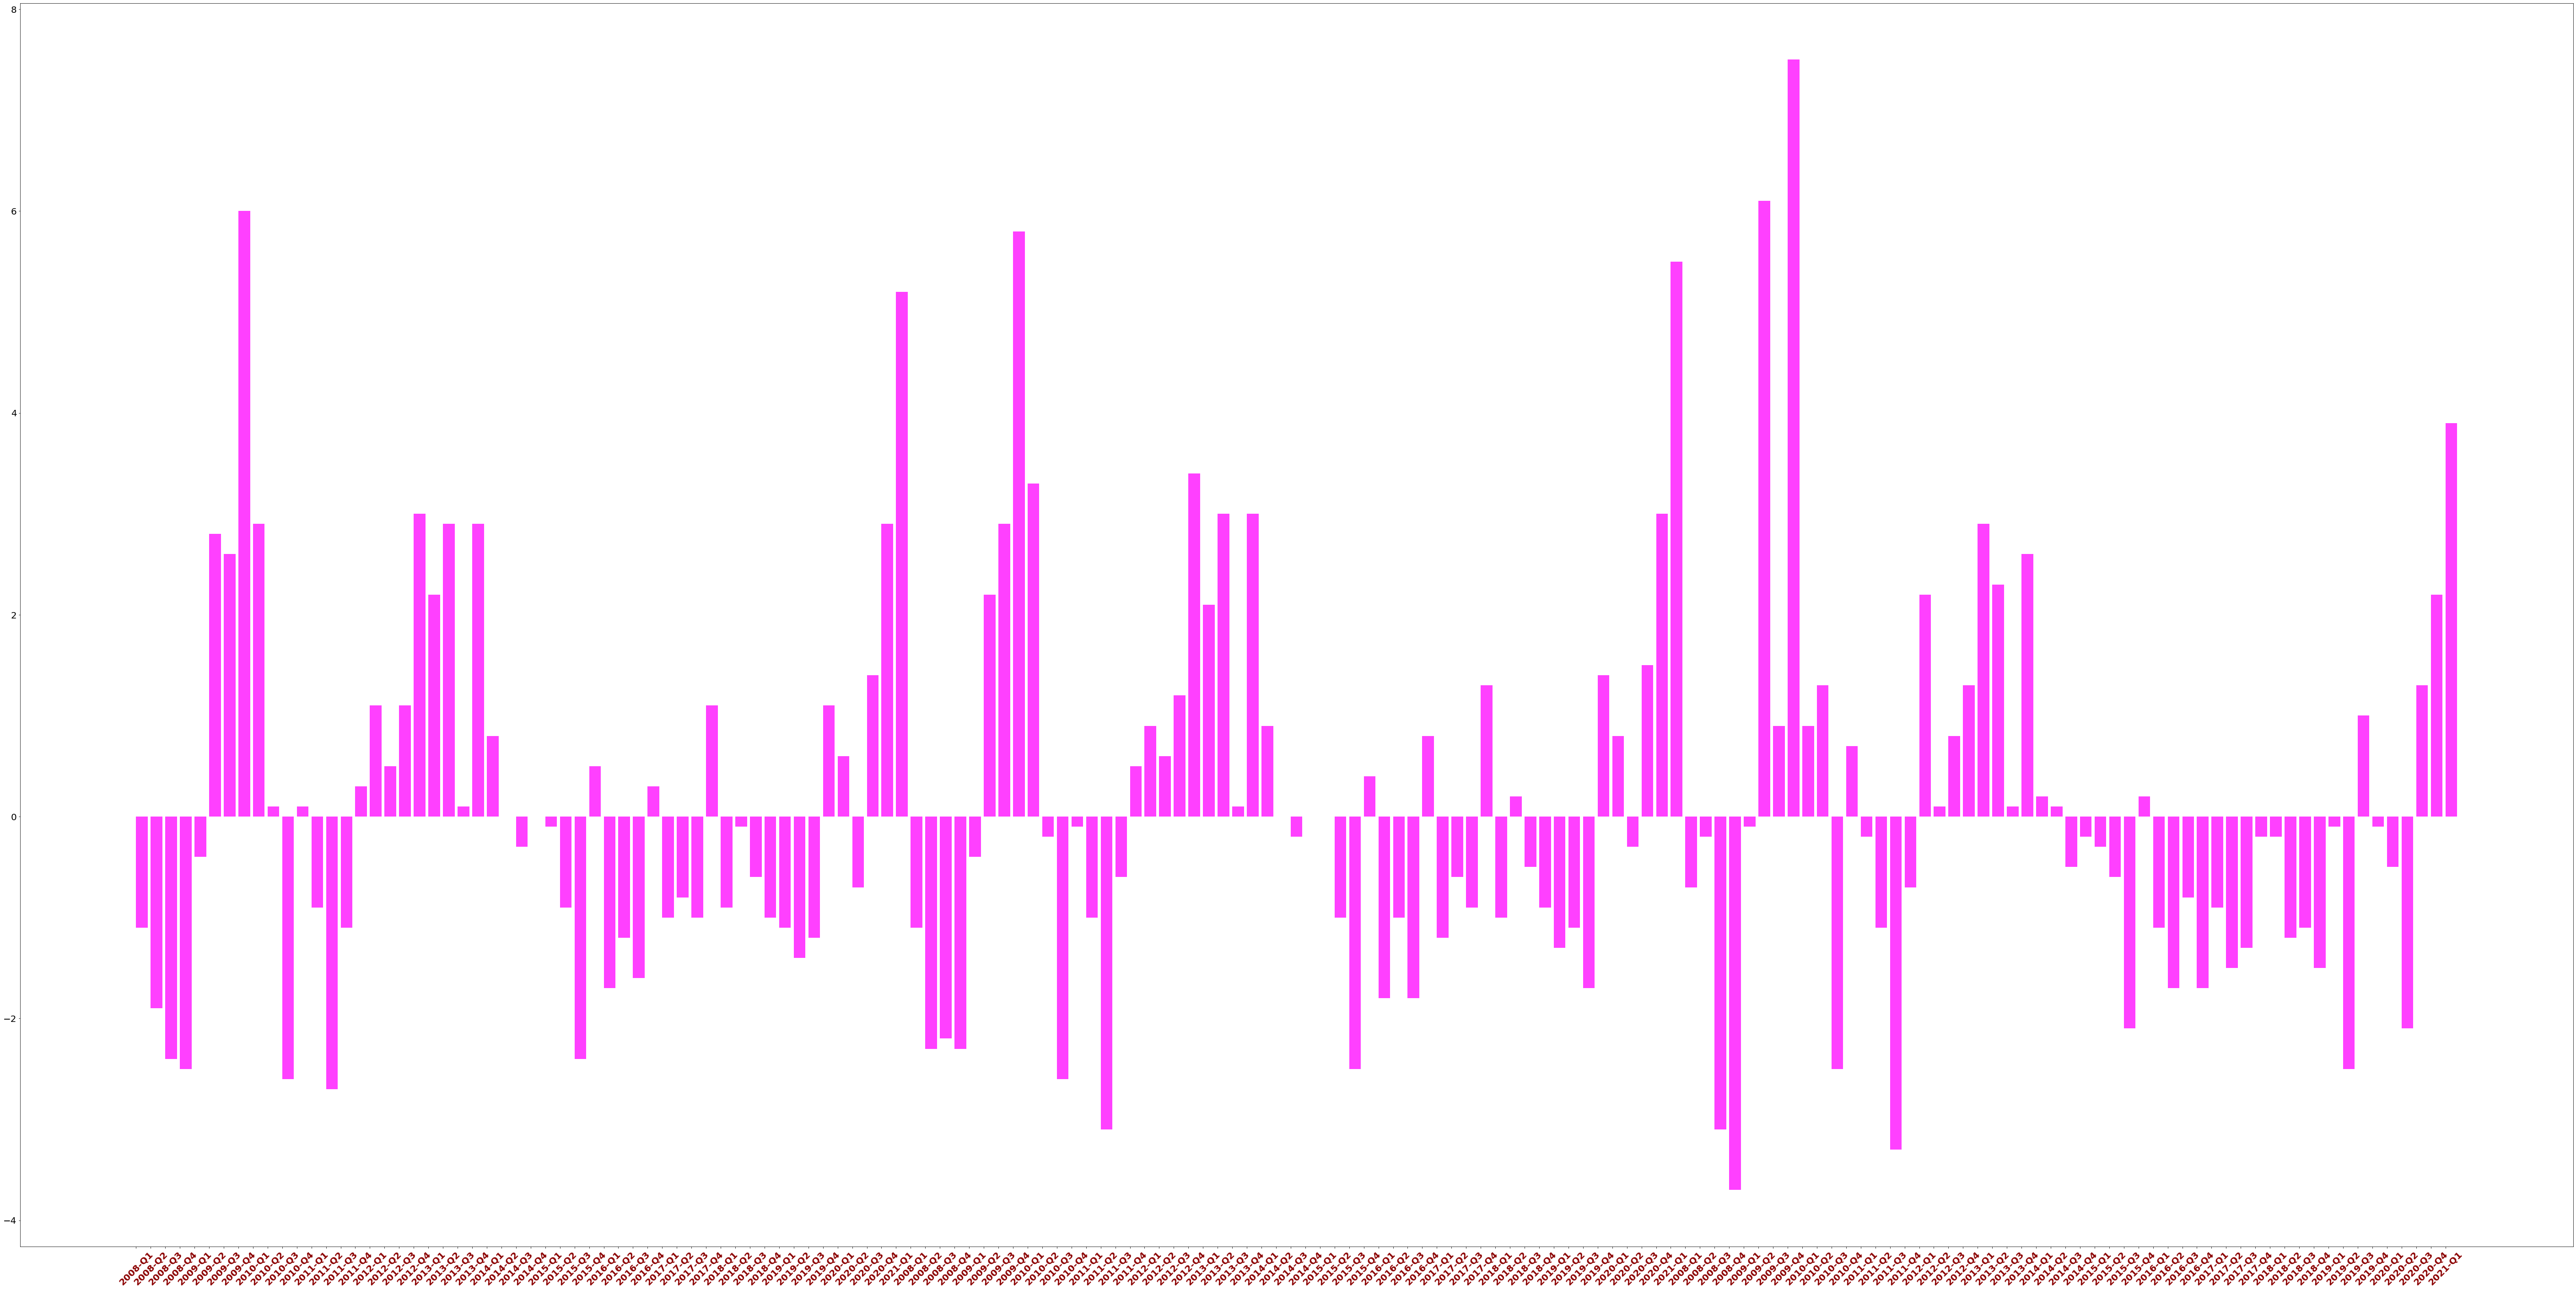

<Figure size 432x288 with 0 Axes>

In [19]:
# The bar graph of Percentage Change from Previous Period of Established houses, Attached dwellings and Residential property.
x_axis = np.arange(len(Housedata_by_Percentage))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(100,50))
plt.bar(x_axis, Housedata_by_Percentage["Observation Value"], color='magenta', alpha=0.75, align="edge")
plt.xticks(tick_locations, Housedata_by_Percentage["Time Period"], rotation="45",color="darkred",fontsize=20, fontweight= 'bold')
plt.show()
plt.tight_layout()


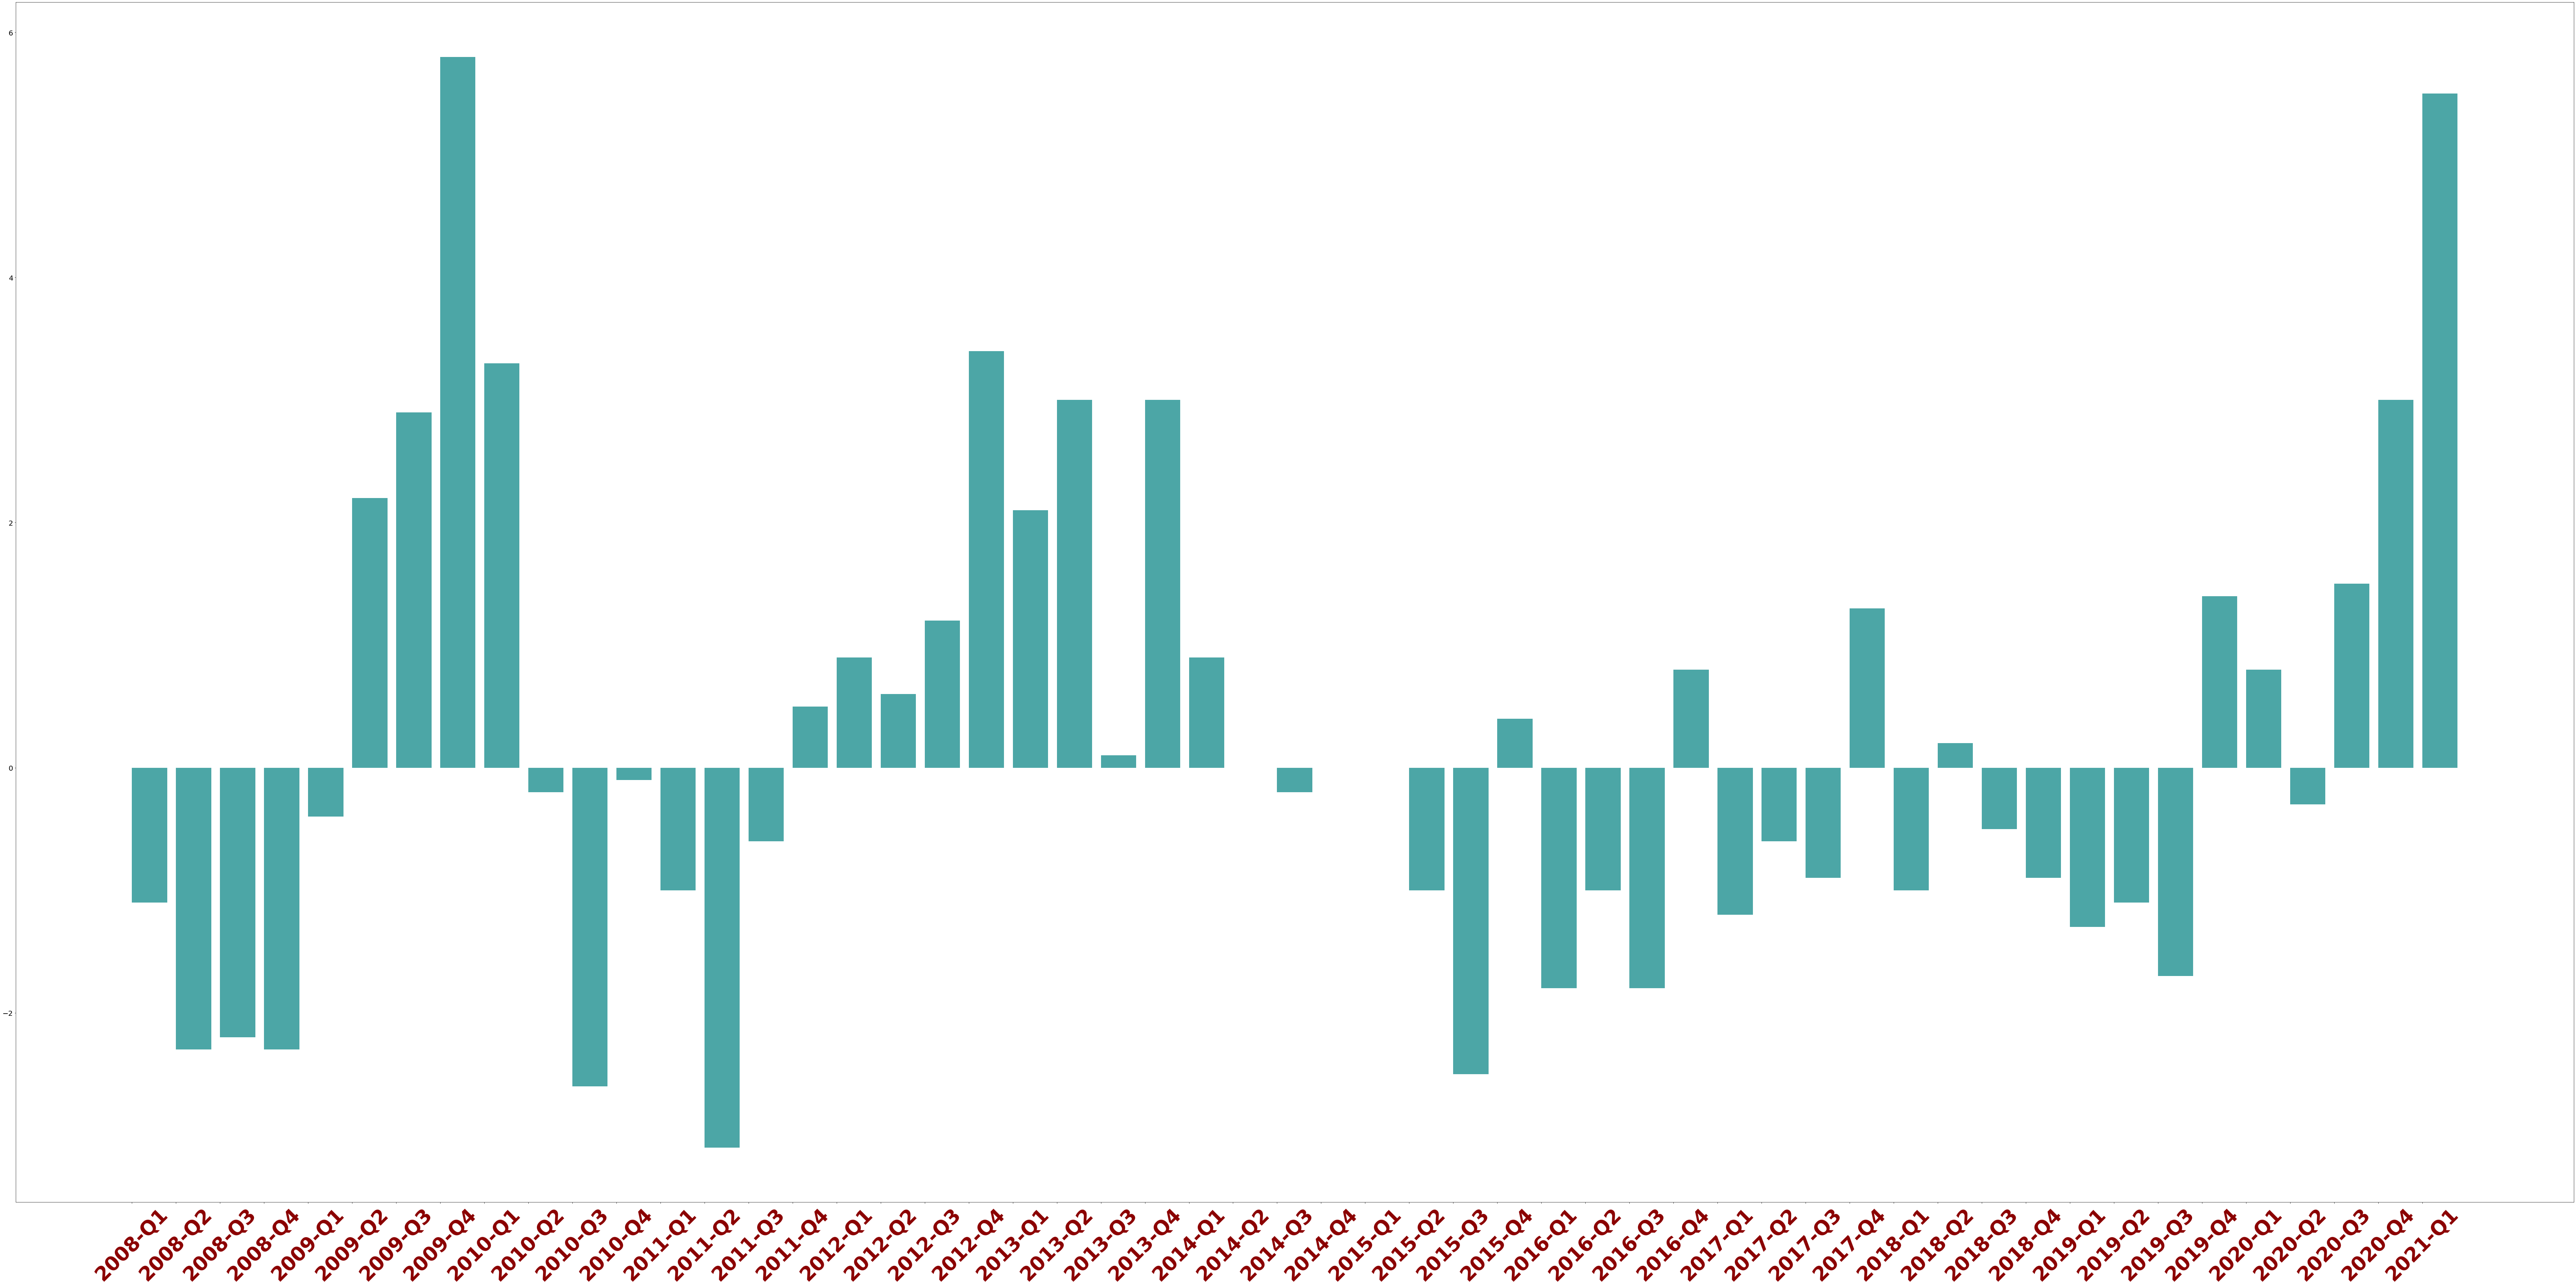

In [20]:
# The bar graph of Percentage Change from Previous Period of Established houses
x_axis = np.arange(len(Established_housdata))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(100,50))
plt.bar(x_axis, Established_housdata["Observation Value"], color='teal', alpha=0.7, align="edge")
plt.xticks(tick_locations,Established_housdata["Time Period"], rotation="45",color="darkred",fontsize=55, fontweight= 'bold')

plt.tight_layout()
plt.show()

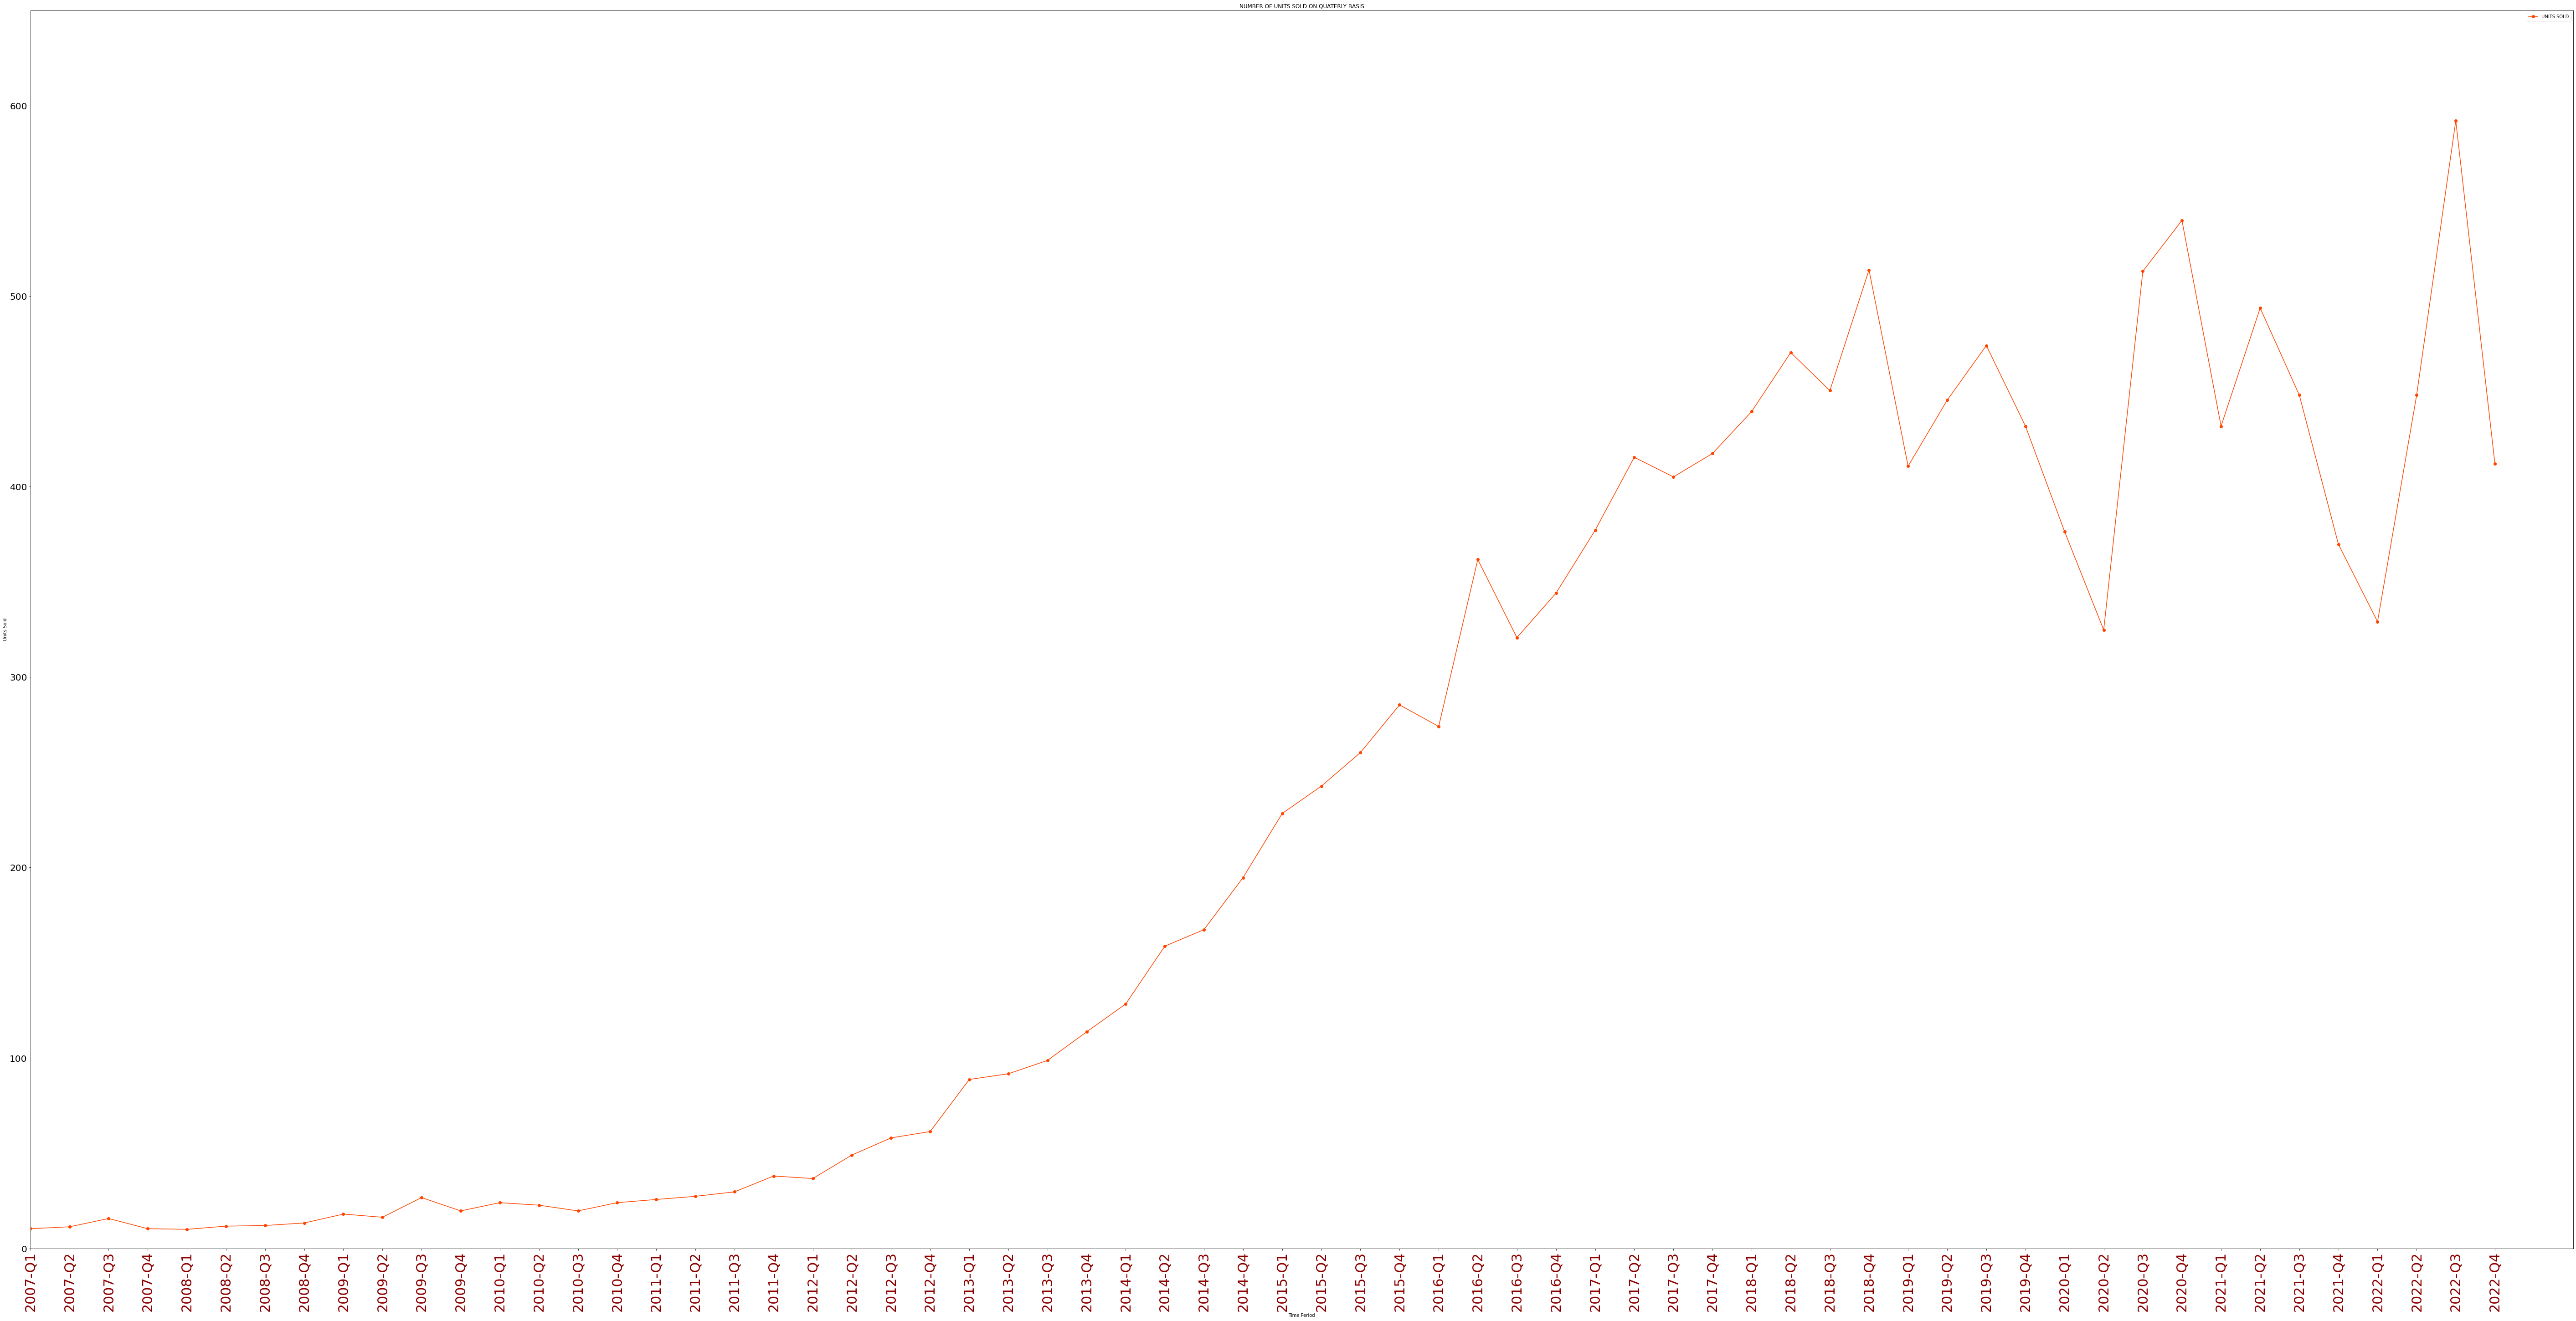

In [116]:
# Plot the line chart of house_pricee w.r.t to time Period

x_axis =Ironore_and_house_prices_df1["Time Period"]
y_axis=Ironore_and_house_prices_df1["Units Sold Number"]
plt.figure(figsize=(100,50))
house_prices, = plt.plot(x_axis, y_axis, color="orangered",marker='o', label="UNITS SOLD")
plt.xticks(x_axis,Ironore_and_house_prices_df1["Time Period"], rotation="90",color="darkred",fontsize=30, fontweight= 'normal')
plt.title("NUMBER OF UNITS SOLD ON QUATERLY BASIS")
plt.xlabel("Time Period")
plt.ylabel("Units Sold")
plt.legend(loc="best")
plt.xlim(0,65)
plt.ylim(0,650)
plt.show()


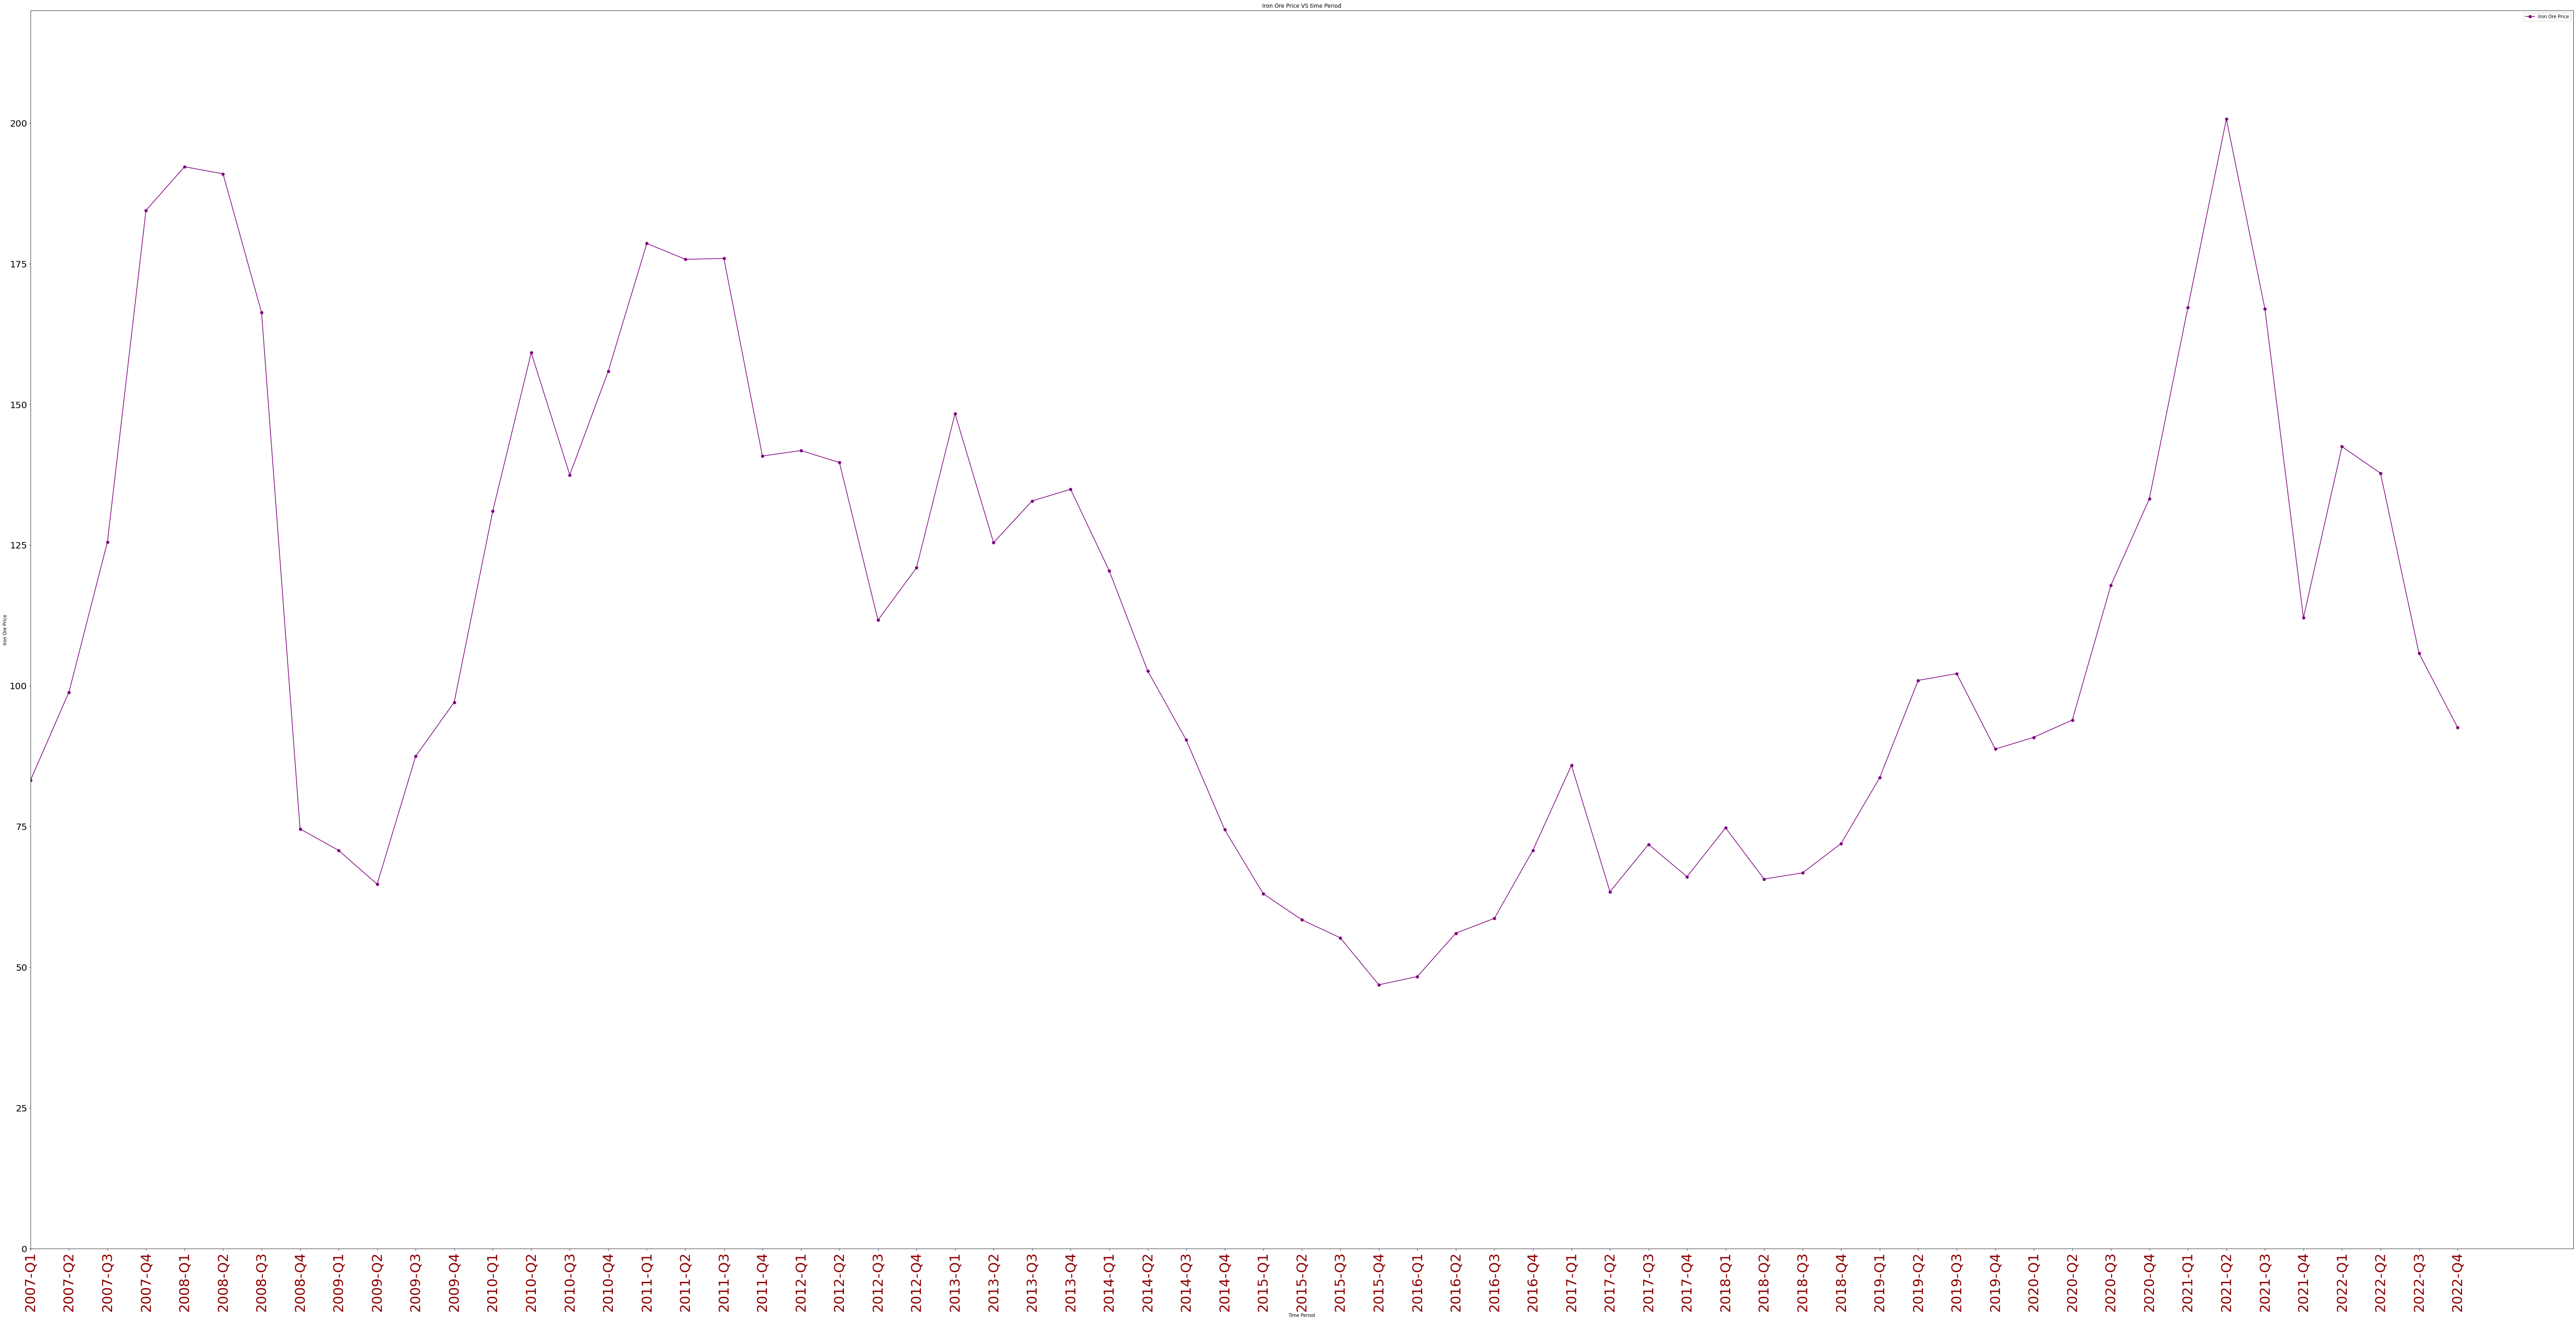

In [117]:
# Plot the line chart of Iron Ore Price w.r.t to time Period
x_axis =Ironore_and_house_prices_df1["Time Period"]
y_axis=Ironore_and_house_prices_df1["Iron Ore Price"]
plt.figure(figsize=(100,50))
house_prices, = plt.plot(x_axis, y_axis, color="purple",marker='o', label="Iron Ore Price")
plt.xticks(x_axis,Ironore_and_house_prices_df1["Time Period"], rotation="90",color="darkred",fontsize=30, fontweight= 'normal')
plt.title("Iron Ore Price VS time Period")
plt.xlabel("Time Period")
plt.ylabel("Iron Ore Price")
plt.legend(loc="best")
plt.xlim(0,66)
plt.ylim(0,220)

plt.show()


DO NOT DELETE-THis IS THE FULL GRAPH - It needs to be scaled and NAMED

<Figure size 2160x720 with 0 Axes>

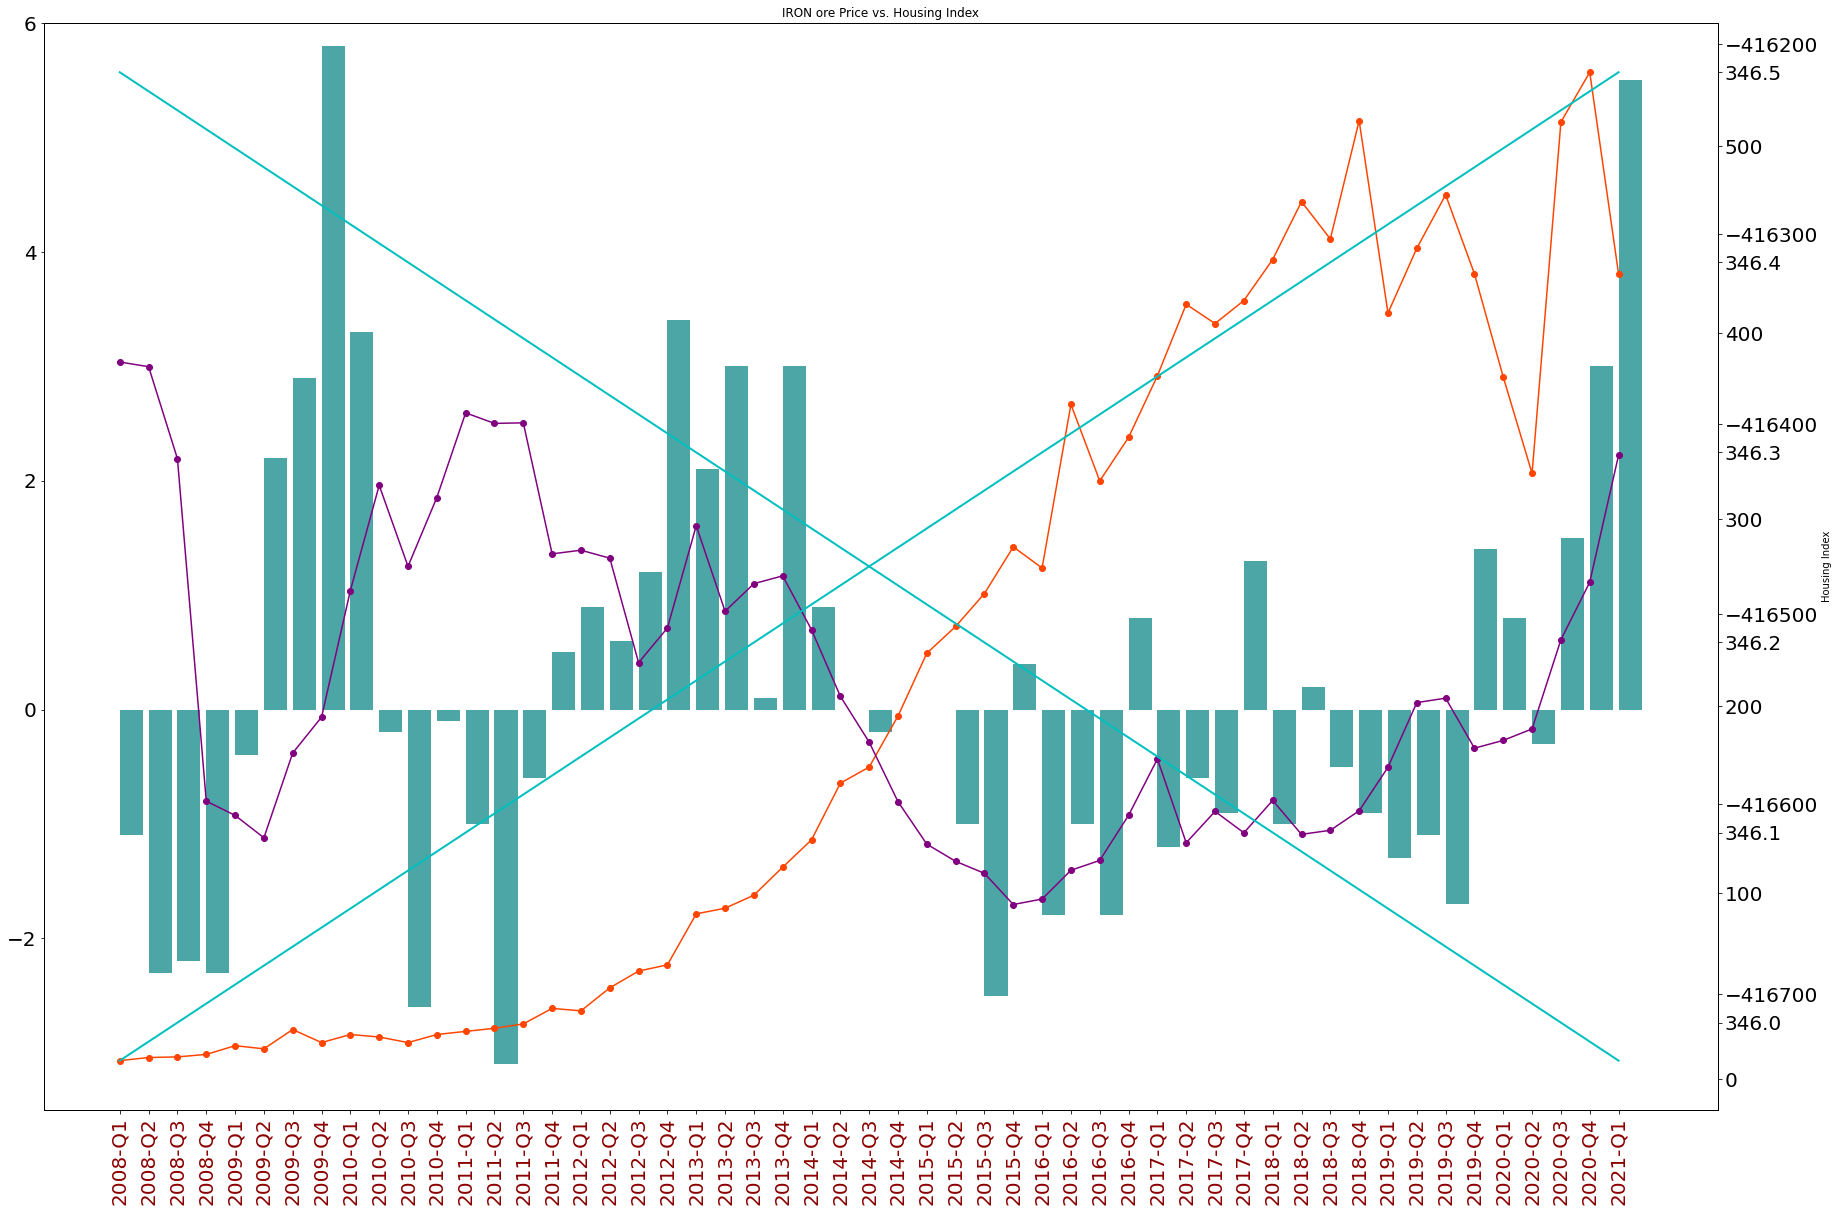

In [109]:
x =merging_analysis_df["Time Period"]
x1 = np.arange(len(merging_analysis_df))
#tick_locations = [value for value in x1]
plt.figure(figsize=(30,10))
y=merging_analysis_df["Units Sold Number"]
y1=merging_analysis_df["Iron Ore Price"]*2
y2=Established_housdata["Observation Value"]

fig, ax = plt.subplots(figsize=(30,20))
plt.xticks(x1,merging_analysis_df["Time Period"], rotation="90",color="darkred",fontsize=20, fontweight= 'normal')
ax2 = ax.twinx()
ax3 = ax.twinx()
ax4 = ax.twinx()
ax.set_ylim([-3.5, 6])
ax.bar(x1,Established_housdata["Observation Value"],color='teal', alpha=0.7, align="edge")
ax2.plot(x,y,color="orangered",marker='o', label="UNITS SOLD")
ax2.plot(x,y1,color="purple",marker='o', label="Iron Ore Price")

# Provide parameters of the linear function
m, c = -0.01, 346.5
# Calculating the y-values for all the x'-values
y6 = (m * x1) + c
# Plotting the line created by the linear function
ax3.plot(x, y6, 'c', linewidth=2, label='y=m*x+c')


#y = 0.1x + -4167.35
# Provide parameters of the linear function
m, c = 0.1, -4167.35
# Calculating the y-values for all the x'-values
y4 = ((m * x1) + c)*100
# Plotting the line created by the linear function
ax4.plot(x, y4, 'c', linewidth=2, label='y=m*x+c')

plt.title("IRON ore Price vs. Housing Index")
plt.xlabel("Time Period")
plt.ylabel("Housing Index")

plt.savefig(f'JOHAN all on one graph.png')
plt.show()

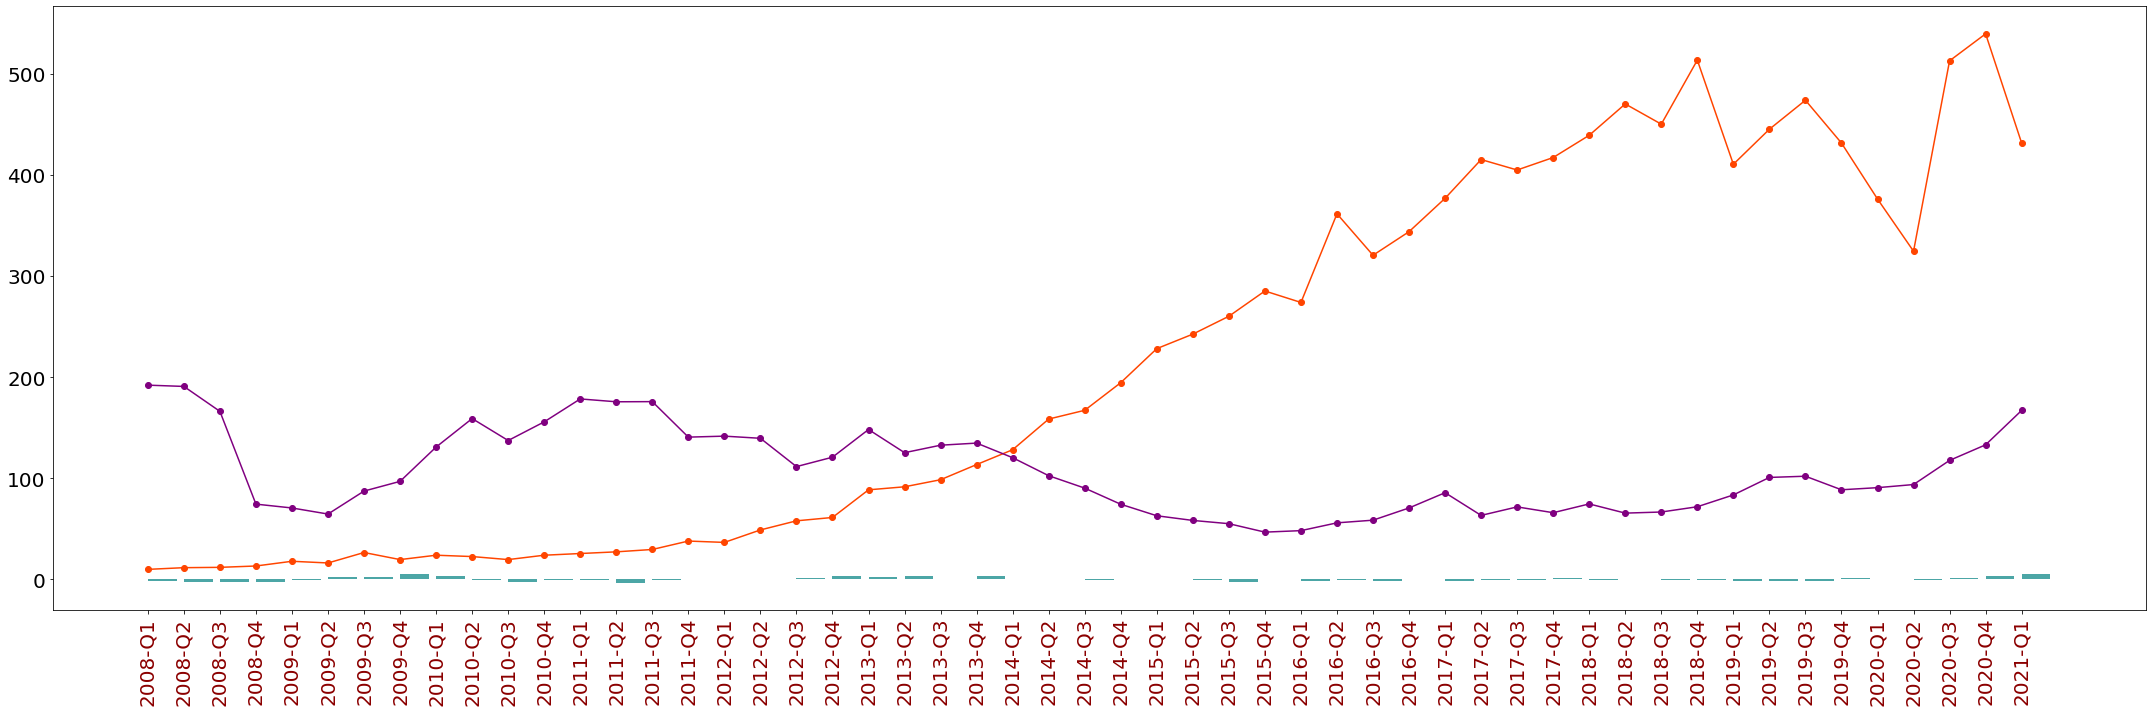

In [118]:
x_axis =merging_analysis_df["Time Period"]
x1_axis = np.arange(len(merging_analysis_df))
tick_locations = [value for value in x_axis]
#labels =merging_analysis_df["Time Period"]
#plt.xticks(x, labels, rotation='vertical')
plt.figure(figsize=(30,10))
plt.xticks(x1_axis,merging_analysis_df["Time Period"], rotation="90",color="darkred",fontsize=20, fontweight= 'normal')
y_axis=merging_analysis_df["Units Sold Number"]
y1_axis=merging_analysis_df["Iron Ore Price"]

plt.bar(x1_axis,Established_housdata["Observation Value"],color='teal', alpha=0.7, align="edge")
plt.plot(x_axis,y_axis,color="orangered",marker='o', label="UNITS SOLD")
plt.plot(x_axis,y1_axis,color="purple",marker='o', label="Iron Ore Price")

# plt.annotate(a,(5.8,0.8),fontsize=15,color="red")
plt.tight_layout()
plt.show()

In [26]:
#fig, ax = plt.subplots()

#df['data'].plot(kind='bar', color='red')
#df['data'].plot(kind='line', marker='*', color='black', ms=10)

#plt.show()

DON NOT DELETE*THE Scatter Plots uses a funtion to call and determine the REGRESION LINE - The test is to find the intesection of the two datasets on the main timeline**
# New Section

In [27]:
#load House price and iron ore price file 
data_to_load = "MASTER_ORE_JOHAN.csv"
data = pd.read_csv(data_to_load )

#clening process
NEWDATA=data.dropna(axis ='columns')
NEWDATA_df = pd.DataFrame(NEWDATA)
NEWDATA_df.to_csv("MASTER_ORE_JOHAN_TEST.csv", index = False)
NEWDATA_df.head()

,Date,Date.1,Q PRICE IO,Q House Sold Value,Q Units Sold,Q1 TimeValue
0,2007M01,2007-Q1,83.14,"$8,263,333",10.33,39083
1,2007M04,2007-Q2,98.83,"$8,529,000",11.33,39173
2,2007M07,2007-Q3,125.54,"$11,707,000",15.67,39264
3,2007M10,2007-Q4,184.44,"$7,729,167",10.33,39356
4,2008M01,2008-Q1,192.20,"$7,273,333",10.00,39448


In [31]:
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('TIME')
    plt.ylabel(f'{y_label}')
    plt.grid()

The r-square is -0.22845931959533292
y = -0.01x + 346.59


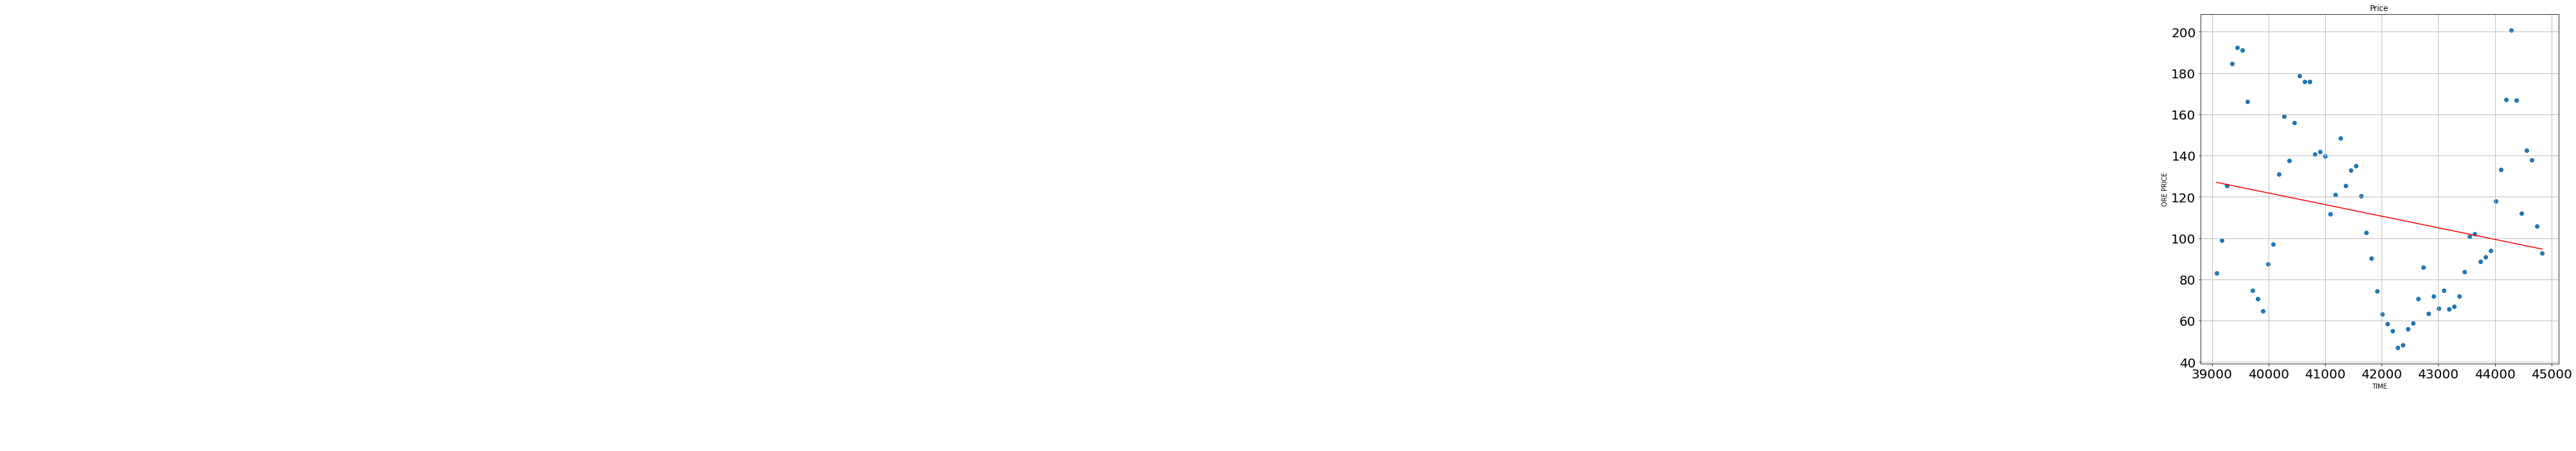

In [120]:
#set the data sets to compare
x_values = NEWDATA_df["Q1 TimeValue"]
y_values = NEWDATA_df["Q PRICE IO"]
fig = plt.figure(figsize=(10,10))
regEQplotX = 0
regEQplotY = 0
#label the y axis
y_label = "ORE PRICE"
#give the title
plt.title(f'Price')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'IRON ORE vs TIME Regression.png')
plt.show()

The r-square is -0.3443259245919312
y = -0.08x + 127.92


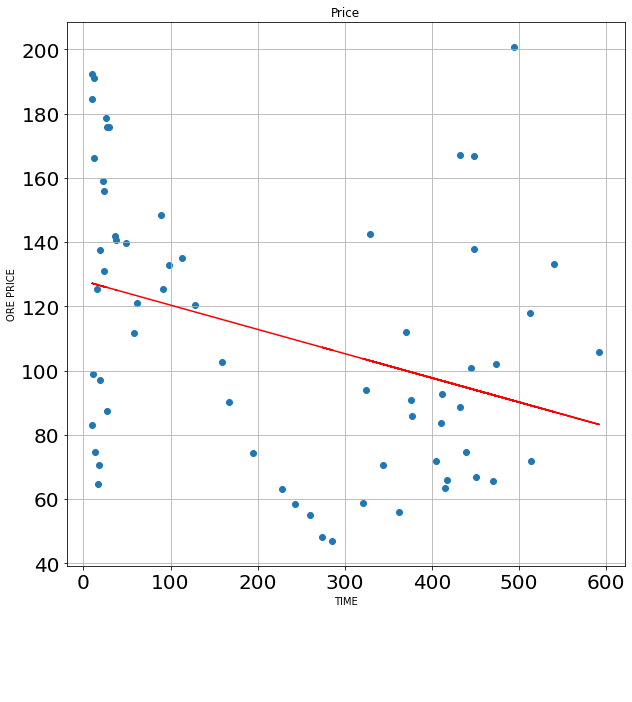

In [119]:
#set the data sets to compare
x_values = NEWDATA_df["Q Units Sold"]
y_values = NEWDATA_df["Q PRICE IO"]
fig = plt.figure(figsize=(10,10))
regEQplotX = 0
regEQplotY = 0
#label the y axis
y_label = "ORE PRICE"
#give the title
plt.title(f'Price')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'IRON ORE vs TIME Regression.png')
plt.show()

The r-square is 0.9342005032512742
y = 0.1x + -4167.35


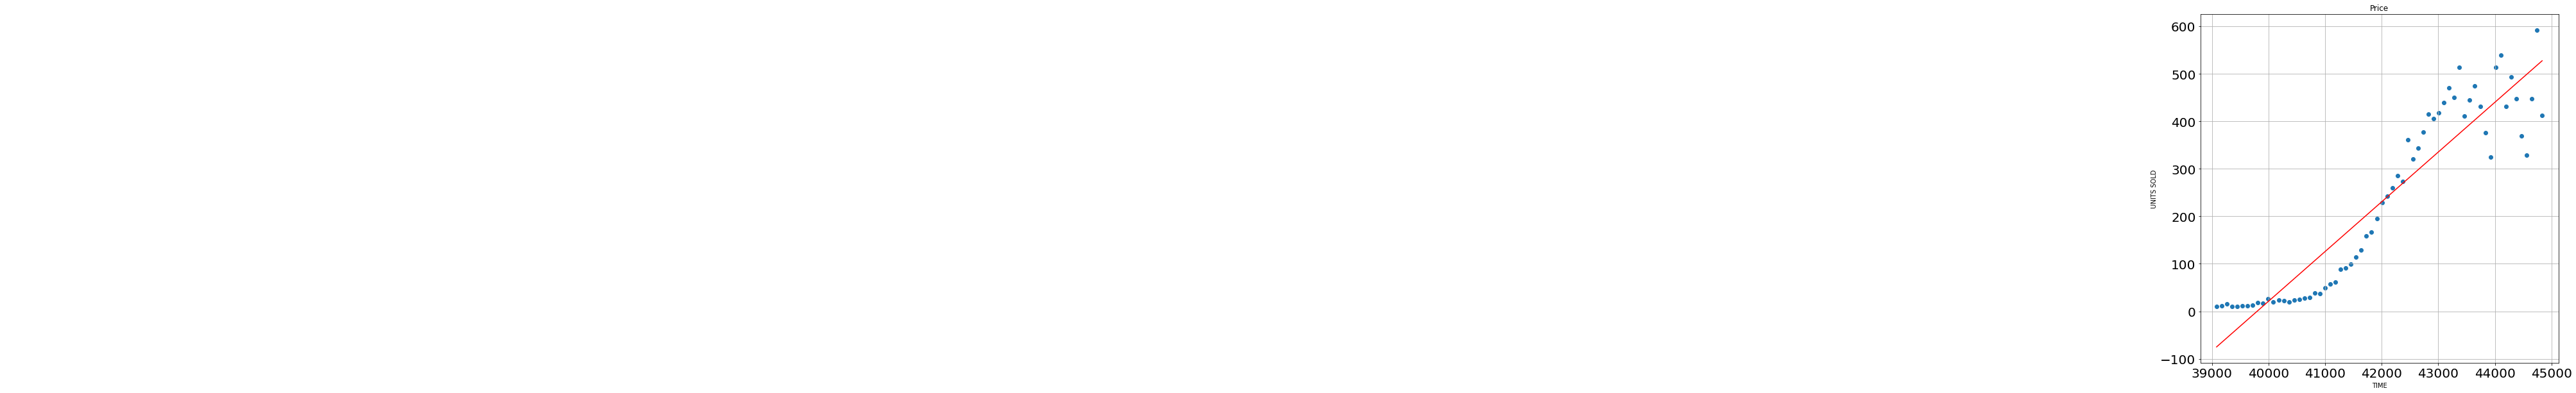

In [33]:
#set the data sets to compare
x_values = NEWDATA_df["Q1 TimeValue"]
y_values = NEWDATA_df["Q Units Sold"]
fig = plt.figure(figsize=(10,10))
regEQplotX = 0
regEQplotY = 0
#label the y axis
y_label = "UNITS SOLD"
#give the title
plt.title(f'Price')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'HOUSE Sold vs TIME Regression.png')
plt.show()

## our conclusions, including a numerical summary and visualisations of the summary

# # Use at least one API—if you can find one with data pertinent to your primary research questions.

In [ ]:
url1 = "https://api.data.abs.gov.au/data/ABS,RPPI,1.0.0/2.1+3.5GPER.Q?startPeriod=2020-Q1&endPeriod=2021-Q1&dimensionAtObservation=AllDimensions&format=jsondata"
# api_format = "json"

In [ ]:
# https://api.data.abs.gov.au/data/jv/all?startPeriod=2020&format=jsondata

In [ ]:
response = requests.get(url1)
print(response.url)

In [ ]:
# Storing the JSON response within a variable
data = response.json()
# Use json.dumps to print the json
print(json.dumps(data, indent=4, sort_keys=True))

In [ ]:
housedata_url = data["data"][0]
housedata_response = requests.get(housedata_url).json()
housedata_response

In [ ]:
# base_url="https://api.data.abs.gov.au/data/ABS,RPPI,1.0.0/2.1+2+3.."

In [ ]:
# character_id = '4'
# url = base_url + character_id

In [ ]:
response = requests.get(url1)

In [ ]:
response_json=response.json()
# print(json.dumps(response_json, indent=4, sort_keys=True))

In [ ]:
url = "https://api.data.abs.gov.au/data/ABS,RPPI,1.0.0/2+1+3.1+2+3.5GPER.Q?startPeriod=2008-Q1&endPeriod=2021-Q1"

In [ ]:
response = requests.get(url)

In [ ]:
 response.json()
# print(json.dumps(response_json, indent=4, sort_keys=True))

## The implications of your findings: what do your findings mean